<a href="https://colab.research.google.com/github/DesaData/DesaData/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np

In [77]:
df = pd.read_csv('Housing.csv')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [79]:
df.isna().sum()

,0
Transaction date,0
House Age,0
Distance from nearest Metro station (km),0
Number of convenience stores,0
latitude,0
longitude,0
Number of bedrooms,0
House size (sqft),0
House price of unit area,0


<Axes: >

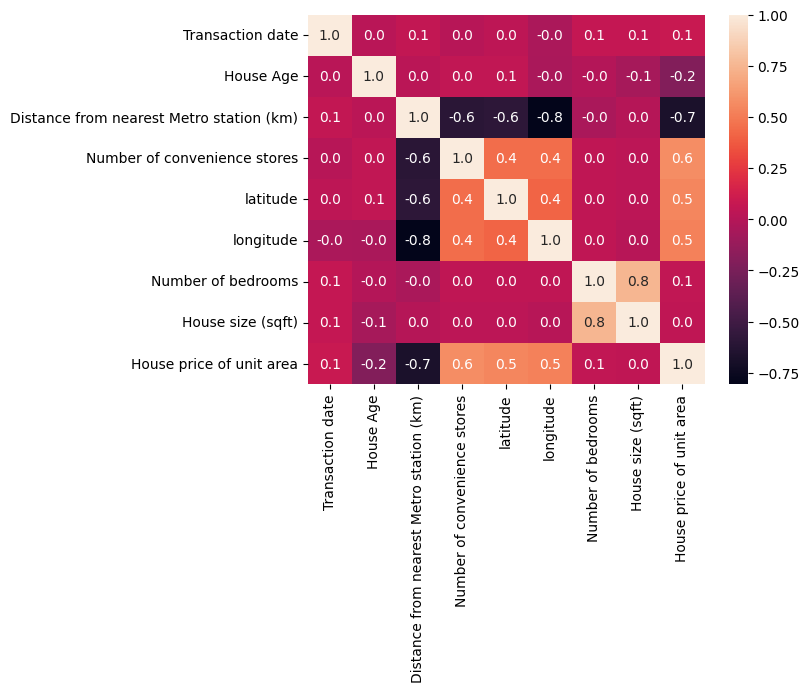

In [80]:
import seaborn as sns
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.1f')

<function matplotlib.pyplot.show(close=None, block=None)>

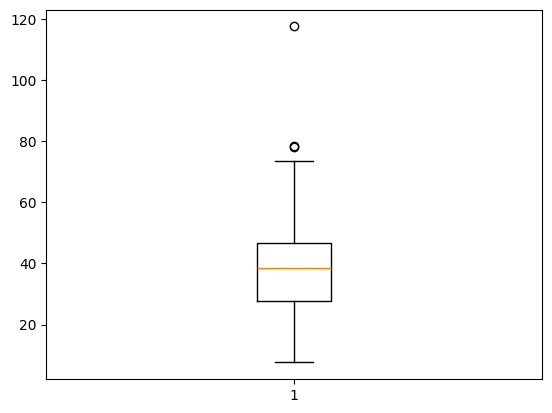

In [81]:
import matplotlib.pyplot as plt
plt.boxplot(df['House price of unit area'])
plt.show

In [82]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [83]:
#Remove outliers#


In [84]:
#Split Data#
X = df[['Number of convenience stores', 'latitude', 'longitude']]
y = df['House price of unit area']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
from sklearn.metrics import mean_absolute_error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print('MAE Baseline:', round(mae_baseline, 2))
print('Mean:', round(y_mean, 2))

MAE Baseline: 10.65
Mean: 38.39


In [86]:
#Build Model#
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
#Train the model#
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print('MAE training:', round(mae_training, 2))
#r2 scores#
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_training)
print('r2_score:', round(r2, 2))

MAE training: 7.27
r2_score: 0.45


In [88]:
#test the model#

y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('MAE test:', round(mae_test, 2))


MAE test: 6.43


In [89]:
r2=r2_score(y_test, y_pred_test)
print('r2:', round(r2, 2))


r2: 0.59


In [90]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_training))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('rmse_train:', round(rmse_train, 2))
print('rmse_test:', round(rmse_test, 2))

rmse_train: 10.14
rmse_test: 8.26


In [94]:
def make_predictions(Number_of_convenience_stores, latitude, longitude):
  data={'Number of convenience stores': Number_of_convenience_stores,
        'latitude': latitude,
        'longitude': longitude
  }
  df = pd.DataFrame(data, index=[0])
  data = model.predict(df).round(1)
  return f"predicted prices $ {data}"

  make_predictions(40, 30, 100)


In [95]:
make_predictions(40, 30, 100)

'predicted prices $ [-2952.]'